<h1 style="text-align: center;">II. Descriptive Analysis</h1>

In [3]:
#Importing all the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore", UserWarning)

In [4]:
#Reading the cleaned data 
data=pd.read_excel("GDM_Datadivers.xlsx")

In [5]:
#Creating a copy of the original data to work on, so that the original data is not modified
df=data.copy()

#### Q1.How many participants were diagnosed with GDM ('GDM Diagonised'), and what is their percentage the dataset ?

In [6]:
yes = df['GDM Diagonised'].eq('Yes').sum()
total = len(df)
print(f"GDM cases: {yes}")
print(f"GDM rate: {yes / total:.2%}")

GDM cases: 74
GDM rate: 13.10%


##### Reasoning: Since the prevalence of Gestational Diabetes Mellitus (GDM) is the primary focus of our analysis. It helps in understanding the distribution of the condition in this specific group.

#### Q2.How is the distribution of the dataset w.r.t age and GDM diagnosis?

In [7]:
counts = df.groupby('Age_gt_30')['GDM Diagonised'].value_counts().unstack()
percentages = counts.div(counts.sum(axis=1), axis=0).mul(100).round(1)
percentages.columns = ['Not Recorded (%)', 'Non-GDM (%)', 'GDM (%)']
print(percentages)

           Not Recorded (%)  Non-GDM (%)  GDM (%)
Age_gt_30                                        
No                      2.0         88.2      9.9
Yes                     2.8         82.3     14.9


##### Reasoning: GDM prevalence increases by 5 percentage points in the >30 age group (from 9.9% to 14.9%). Age > 30 is a clear risk factor.

#### Q3. What is the distribution of BMI values across the dataset? 

   WeightinV1  Height_cms   BMI
0        59.4       169.6  20.7
1        70.1       154.9  29.2
2        64.9       157.8  26.1
3        67.1       164.7  24.7
4        67.5       169.9  23.4


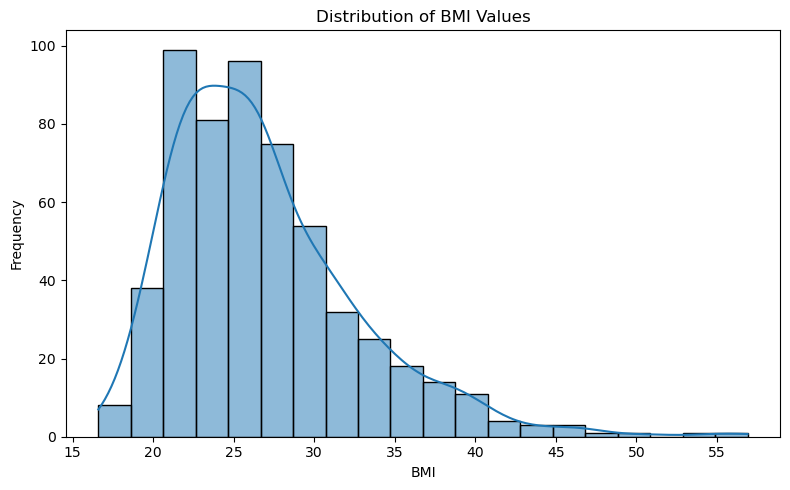

In [8]:
# Convert height from cm to meters
df['Height_m'] = df['Height_cms'] / 100
df['BMI'] = df['WeightinV1'] / (df['Height_m'] ** 2)
df['BMI'] = df['BMI'].round(1)
print(df[['WeightinV1', 'Height_cms', 'BMI']].head())
plt.figure(figsize=(8, 5))
sns.histplot(df['BMI'], bins=20, kde=True)
plt.title('Distribution of BMI Values')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
#df['BMI'].describe()

***Reasoning: Higher BMI may be correlated to a higher risk of GDM. We also found higher resting heart rates and higher risk of emergency C-sections among those with BMI in this dataset.***

#### Q4. Compare participants of age > 30 and age < 30 with  BMI range for both GDM and Non gdm participants? 

In [9]:
# Define BMI categories function 
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMIinV1'].apply(bmi_category)

# Map age and GDM for clarity
df['Age_Group'] = df['Age_gt_30'].map({'No': '<=30', 'Yes': '>30'})
df['GDM_Status'] = df['GDM Diagonised'].map({'No': 'No GDM', 'Yes': 'GDM'})

age_groups = ['<=30', '>30']
gdm_statuses = ['No GDM', 'GDM']

for age in age_groups:
    for gdm in gdm_statuses:
        subset = df[(df['Age_Group'] == age) & (df['GDM_Status'] == gdm)]
        counts = subset['BMI_Category'].value_counts()
        total = counts.sum()
        print(f"\nAge Group: {age}, GDM Status: {gdm}")
        for category, count in counts.items():
            pct = (count / total) * 100 if total > 0 else 0
            print(f"  {category}: {count} ({pct:.1f}%)")
        if total == 0:
            print("  No participants in this group.")


Age Group: <=30, GDM Status: No GDM
  Normal: 78 (43.6%)
  Overweight: 55 (30.7%)
  Obese: 43 (24.0%)
  Underweight: 3 (1.7%)

Age Group: <=30, GDM Status: GDM
  Normal: 10 (50.0%)
  Obese: 6 (30.0%)
  Overweight: 4 (20.0%)

Age Group: >30, GDM Status: No GDM
  Normal: 128 (43.0%)
  Overweight: 105 (35.2%)
  Obese: 63 (21.1%)
  Underweight: 2 (0.7%)

Age Group: >30, GDM Status: GDM
  Obese: 23 (42.6%)
  Overweight: 16 (29.6%)
  Normal: 15 (27.8%)


***Reasoning:  GDM is more prevalent among patients who are aged above 30 and have abnormal BMI. Obesity is a consistent risk factor: Across both age groups, obesity is overrepresented in GDM cases compared to non-GDM.***

#### Q5.What is the average BirthWeight of infants in the dataset, and how does it vary between infants born to mothers with and without GDM?

In [10]:
overall = df['BirthWeight'].mean()
gdm = df[df['GDM Diagonised'] == 'Yes']['BirthWeight'].mean()
no_gdm = df[df['GDM Diagonised'] == 'No']['BirthWeight'].mean()

print(f"Average BirthWeight overall: {overall:.2f}")
print(f"With GDM: {gdm:.2f}")
print(f"Without GDM: {no_gdm:.2f}")

Average BirthWeight overall: 3.53
With GDM: 3.42
Without GDM: 3.54


***Reasoning:  Birth weight is a critical outcome measure. Comparing birth weights between GDM and non-GDM groups can help to understand the whether lower birth weight or higher birth weight are common in babies***

#### Q6. What is the distribution of types of delivery?

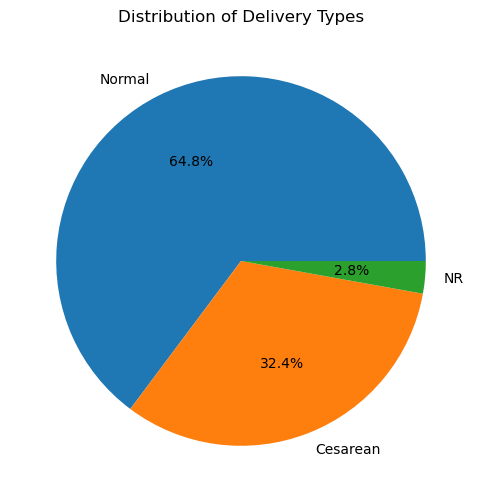

In [11]:
label_map = {0.0: 'Normal', 1.0: 'Cesarean','NR' : 'NR'}
df['delivery_type_label'] = df['Caesarean'].map(label_map)

# Plot the pie chart
df['delivery_type_label'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6, 6),
    title='Distribution of Delivery Types'
)

plt.ylabel('')  # Hide y-axis label
plt.show()


#What is the distribution of types of delivery?
# df['DeliveryType'] = df['Caesarean'].map({0.0: 'Normal', 1.0: 'Cesarean','NR':'NR'})
# delivery_counts=df['DeliveryType'].value_counts()
# delivery_percent = df['DeliveryType'].value_counts(normalize=True) * 100
# distribution=pd.DataFrame({'Count': delivery_counts,
#                         'Percntage':delivery_percent.round(2)
#                           })
# print(distribution)

***Reasoning: It is important we know how many had normal and C-section in the dataset so we could further analyze the factors contributing to a particular delivery type***

#### Q7. What percentage of patients have a history of GDM?

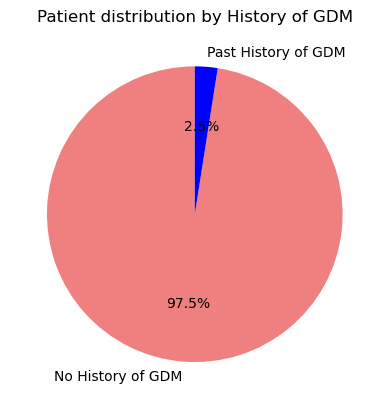

In [12]:
history_gdm = df['PreviousGDM10 V1'].value_counts().rename({0 : 'No History of GDM', 1:'Past History of GDM'})
#pie chart
plt.pie(history_gdm, labels=history_gdm.index, autopct='%1.1f%%',startangle = 90, colors=['lightcoral', 'blue'])
plt.title("Patient distribution by History of GDM")
plt.show()

***Reasoning: History of GDM increases the risk of GDM diagnosis for the current pregnancy signigicantly. Understanding the distribution of patients by history of GDM (Gestational Diabetes Mellitus) is critical for identifying high-risk populations, enabling targeted interventions, and improving maternal and fetal health outcomes.***

#### Q8. What is the distribution of gestational age at delivery ? 

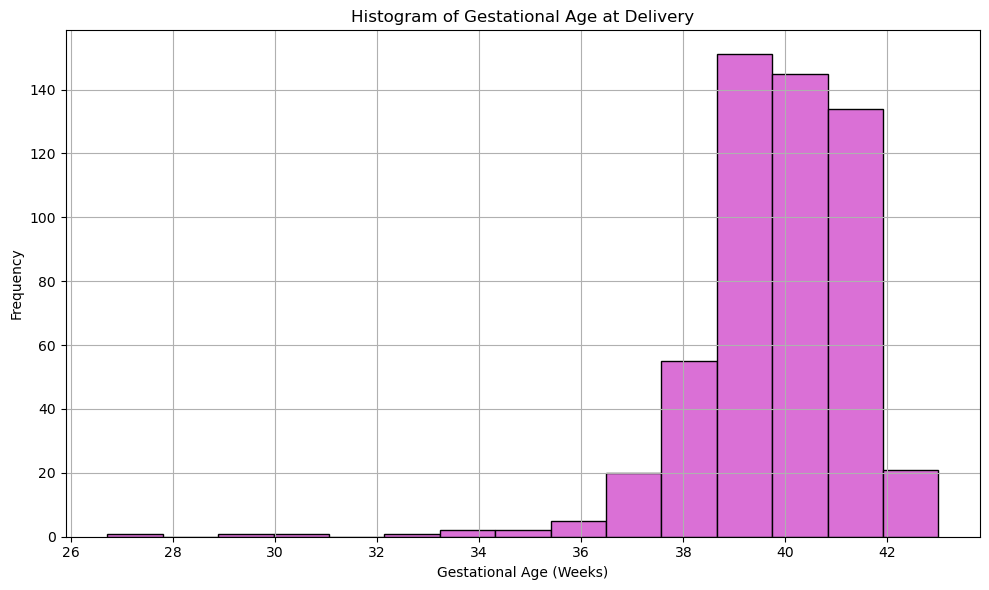


--- Categorized Gestational Ages ---
GA Category
Full term or later          546
Moderate to late preterm     16
Very preterm                  2
Extremely preterm             1
Name: count, dtype: int64


In [13]:
plt.figure(figsize=(10,6))
df['GA at delivery'].plot(kind='hist', bins=15, color='orchid', edgecolor='black')
plt.title("Histogram of Gestational Age at Delivery")
plt.xlabel("Gestational Age (Weeks)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

def categorize_ga(ga_weeks):
    if ga_weeks < 28:
        return 'Extremely preterm'
    elif ga_weeks < 32:
        return 'Very preterm'
    elif ga_weeks < 37:
        return 'Moderate to late preterm'
    else:
        return 'Full term or later'

# Apply categorization to your dataset
df['GA Category'] = df['GA at delivery'].apply(categorize_ga)

# Display counts by category
print("\n--- Categorized Gestational Ages ---")
print(df['GA Category'].value_counts())

***Reasoning: Understanding the distribution of gestational age at delivery can provide insights into the typical delivery times within the dataset and identify any unusually early or late deliveries. This is crucial for assessing pregnancy outcomes.***

#### Q9. What  is the average gestational age at delivery for  GDM and Non GDM  patients?

In [14]:
filtered_df = df[
    (df['GDM Diagonised'].isin(['Yes', 'No'])) & 
    (df['GA at delivery'].notnull())
].copy()

avg_ga = filtered_df.groupby('GDM Diagonised')['GA at delivery'].mean()
print(avg_ga)

GDM Diagonised
No     39.924424
Yes    39.208494
Name: GA at delivery, dtype: float64


***Reasoning: The average gestational age at delivery helps assess the impact of Gestational Diabetes Mellitus (GDM) on pregnancy outcomes like pre-term births***

#### Q10.What is the distribution of HbA1c levels at Visit 1 and Visit 3, and how do they relate to GDM diagnosis?

In [15]:
# Check average HbA1c at Visit 1 and Visit 3 for each GDM group
mean_hba1c = df.groupby('GDM Diagonised')[['HBA1C_V1', 'HBA1C_V3']].mean().rename(columns = {'HBA1C_V1' : 'Avg HBA1C_V1','HBA1C_V3':'Avg HBA1C_V3'})
print(mean_hba1c)
print()

#get count and standard deviation
print('\t\t\t\t HbA1c Statistics')
stats_hba1c = df.groupby('GDM Diagonised')[['HBA1C_V1', 'HBA1C_V3']].agg(['count', 'mean', 'std'])
print(stats_hba1c)

                Avg HBA1C_V1  Avg HBA1C_V3
GDM Diagonised                            
NR                 31.500000     33.000000
No                 31.969163     33.266520
Yes                33.279412     33.823529

				 HbA1c Statistics
               HBA1C_V1                      HBA1C_V3                     
                  count       mean       std    count       mean       std
GDM Diagonised                                                            
NR                    2  31.500000  2.121320        2  33.000000  2.828427
No                  454  31.969163  2.351820      454  33.266520  2.838069
Yes                  68  33.279412  3.065677       68  33.823529  3.781105


***Reasoning: HbA1c reflects long-term glucose control. Comparing these values GDM vs. non-GDM groups can highlight early glycemic patterns***

#### Q11. What is the average weight again from visit 1 First trimester and Visit 3 third trimester ?

In [16]:
# Calculate average weight at Visit 1 and Visit 3
avg_weights = df[['WeightinV1', 'WeightinV3']].mean()

print("Average Weight at Visit 1 (First Trimester): {:.2f} kg".format(avg_weights['WeightinV1']))
print("Average Weight at Visit 3 (Third Trimester): {:.2f} kg".format(avg_weights['WeightinV3']))

# Create a new column for weight change (Visit 3 - Visit 1)
df['Weight_Change'] = df['WeightinV3'] - df['WeightinV1']

# Calculate average weight change grouped by GDM diagnosis
avg_weight_change = df.groupby('GDM Diagonised')['Weight_Change'].mean()

print("\nAverage Weight Change from Visit 1 to Visit 3 by GDM Diagnosis:")
print(avg_weight_change)


Average Weight at Visit 1 (First Trimester): 72.17 kg
Average Weight at Visit 3 (Third Trimester): 82.66 kg

Average Weight Change from Visit 1 to Visit 3 by GDM Diagnosis:
GDM Diagonised
NR     15.250000
No     11.014923
Yes     7.257353
Name: Weight_Change, dtype: float64


***Reasoning: This helps to compare average weight change specific to GDM participants and Non GDM participants which is essential to understand how gestational weight gain influences or reflects the development and management of GDM***

#### Q12. What is the distribution of 'OGTT_0h_value', 'OGTT_1h_value', and 'OGTT_2h_value' (Oral Glucose Tolerance Test values) and how do these values relate to the 'GDM Diagonised' status?***

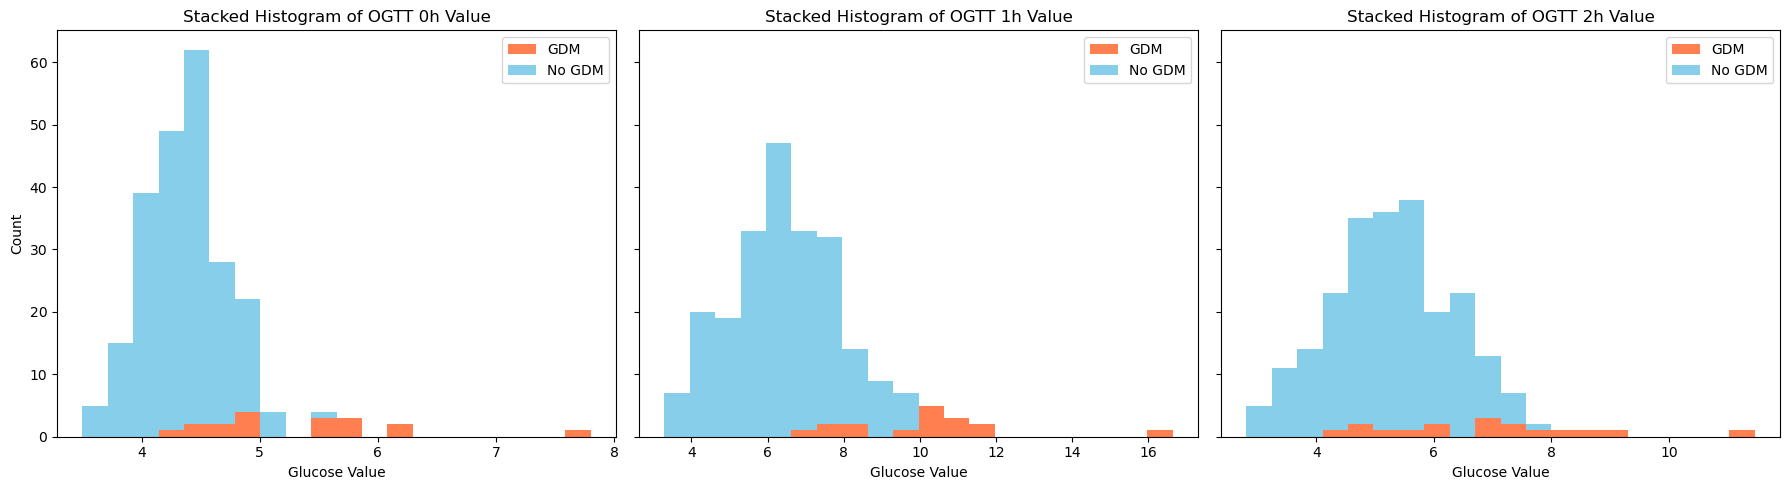

In [17]:
# Define OGTT time points
ogtt_columns = ['OGTT_0h_value', 'OGTT_1h_value', 'OGTT_2h_value']
titles = ['OGTT 0h Value', 'OGTT 1h Value', 'OGTT 2h Value']

# Filter once
gdm_yes = df[df['GDM Diagonised'] == 'Yes']
gdm_no = df[df['GDM Diagonised'] == 'No']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for idx, col in enumerate(ogtt_columns):
    axes[idx].hist([gdm_yes[col], gdm_no[col]], bins=20,
                   stacked=True, label=['GDM', 'No GDM'],
                   color=['coral', 'skyblue'])
    axes[idx].set_title(f'Stacked Histogram of {titles[idx]}')
    axes[idx].set_xlabel('Glucose Value')
    axes[idx].legend()

# Shared y-axis label
axes[0].set_ylabel('Count')

plt.tight_layout()
plt.show()

***Reasoning: The OGTT values are direct indicators used for GDM diagnosis. Analyzing their distribution and correlation with the GDM diagnosis can help understand the diagnostic criteria and the range of glucose levels observed.***

#### Q13. How many patients with abnormal BMI have poor heart health and have had emergencies?

In [18]:
df_filtered = df[       # Assuming patients with HBP,Pre eclampsia ,Eclampsia has heart problem
    (df['BMIinV1'] >= 30) &
    (
        (df['GestationalHP'] == 1) |
        (df['Pre eclampsia'] == 1) |
        (df['Eclampsia'] == 1)
    ) &
    (df['Emergency'] == 'Yes')
]

count = len(df_filtered)
print("High BMI with heart issue in emergency ", count)

High BMI with heart issue in emergency  1


***Reasoning: BMI is a known factor of heart health. Over 60% of all those with BMI not in recommended ranges, were admitted for emergencies***

#### Q14. How many patients with high blood pressure  have poor heart health and have had emergencies?

In [19]:
high_bp = (df['systolicBP_V1'] >= 140) | (df['diastolicBP_V1'] >= 90)

heart_issues = (
    (df['GestationalHP'] == 1) |
    (df['Pre eclampsia'] == 1) |
    (df['Eclampsia'] == 1)
)

emergency = df['Emergency'] == 'Yes'
combined_filter = high_bp & heart_issues & emergency
df_filtered = df[combined_filter]

count = len(df_filtered)
print("HighBP with heart issue in emergency", count)

HighBP with heart issue in emergency 0


***Reasoning: High blood Pressure levels which are usually a marker of heart disease was also a leading factor that was present in over 70% of those admitted for emergency procedure***